In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow as tf

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Training label

a = open('data/train_label.pkl', 'rb')   
label = pickle.load(a) 
a.close
print("Number of labels :",len(label))

Number of labels : 8000


In [3]:
# Training images

img = open('data/train_image.pkl', 'rb')   
image = pickle.load(img) 
img.close
print("length of image :",len(image))
# print(image[0])
print("length of image[0] :",len(image[0]))

length of image : 8000
length of image[0] : 784


In [4]:
# Testing Data
img1 = open('data/test_image.pkl', 'rb')   
test_im = pickle.load(img1) 
img1.close
print("length of image :",len(test_im))
# print(image[0])
print("length of image[0] :",len(test_im[0]))

length of image : 2000
length of image[0] : 784


In [5]:
set(label)

{0, 2, 3, 6}

In [6]:
train_im = np.array(image, dtype='float32')
test_im = np.array(test_im, dtype='float32')

X_train = train_im / 255
Y_train = np.array(label ,dtype = 'uint8')

X_test = test_im / 255

In [7]:
# X_train[0]

In [8]:
for i in range(0,2000):
    Y_train[i] = 0
for i in range(2000,4000):
    Y_train[i] = 1
for i in range(4000,6000):
    Y_train[i] = 2
for i in range(6000,8000):
    Y_train[i] = 3

In [9]:
from keras.utils import to_categorical
encoded = to_categorical(Y_train)

In [10]:
set(Y_train)

{0, 1, 2, 3}

In [11]:
encoded.shape

(8000, 4)

In [12]:
# split the training data into train and validate arrays 

x_train, x_validate, y_train, y_validate = train_test_split(
    X_train, encoded, test_size = 0.2, random_state= 2145,
)

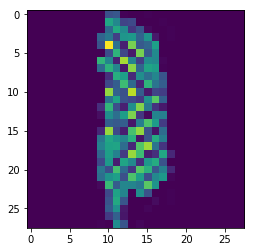

In [13]:
# lets see what the images look like
image1 = x_train[5000, :].reshape((28, 28))

plt.imshow(image1)
plt.show()

In [14]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = X_test.reshape(X_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (6400, 28, 28, 1)
x_test shape: (2000, 28, 28, 1)
x_validate shape: (1600, 28, 28, 1)


MOdel

In [15]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),   #relu
    Dense(4, activation='softmax')
])

In [16]:
# tensorboard = TensorBoard(
#     log_dir=r'logs\{}'.format('cnn_1layer'),
#     write_graph=True,
#     write_grads=True,
#     #histogram_freq=1,
#     write_images=True,
# )

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)
# model.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


In [17]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    #callbacks=[tensorboard]
)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 13s 2ms/step - loss: 1.0172 - acc: 0.5950 - val_loss: 0.6940 - val_acc: 0.7081
Epoch 2/10
6400/6400 [==============================] - 1s 137us/step - loss: 0.6568 - acc: 0.7258 - val_loss: 0.6151 - val_acc: 0.7406
Epoch 3/10
6400/6400 [==============================] - 1s 144us/step - loss: 0.5833 - acc: 0.7661 - val_loss: 0.5635 - val_acc: 0.7750
Epoch 4/10
6400/6400 [==============================] - 1s 157us/step - loss: 0.5281 - acc: 0.8033 - val_loss: 0.5182 - val_acc: 0.7963
Epoch 5/10
6400/6400 [==============================] - 1s 151us/step - loss: 0.4945 - acc: 0.8131 - val_loss: 0.4878 - val_acc: 0.8075
Epoch 6/10
6400/6400 [==============================] - 1s 140us/step - loss: 0.4731 - acc: 0.8225 - val_loss: 0.4972 - val_acc: 0.8063
Epoch 7/10
6400/6400 [==============================] - 1s 139us/step - loss: 0.4575 - acc: 0.8261 - val_loss: 0.4651 - val_acc: 0.8169
E

In [18]:
cnn_model.save('1.model')

In [19]:
score = cnn_model.evaluate(x_train, y_train, verbose=0)

print('training loss: {:.4f}'.format(score[0]))
print('training acc: {:.4f}'.format(score[1]))

training loss: 0.3925
training acc: 0.8580


In [20]:
y = cnn_model.predict_classes(x_test)

y
# # show the inputs and predicted outputs
# for i in range(len(x_train)):
#     print("X=%s, Predicted=%s" % (x_train[i], y[i]))

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [ ]:
for i in range(0,2000):
    if(y[i] = 1):
        y[i] = 2
    else if(y[i] = 2):
        y[i] = 3
    else if(y[i] = 3):
        y[i] = 6
    else:
        y[i] = 0

In [21]:
index = np.arange(len(x_test))
columns = ['class']

In [22]:
df = pd.DataFrame(y, index= index, columns = columns)
df.head()

df.to_csv("cv.csv")

#######################


#######################
#######################


#######################
#######################


#######################
#######################


##############################################


#######################
#######################


#######################
#######################


#######################
#######################


#######################